Approximately 424735 records of randomly selected Yelp.com Reviews from 2005 to date were processed
through Originality.AI to determine the probability of AI Content. A series of experiments were
performed on this data, to get more information about the relationship between the AI Content
and the different features of the reviews. The purpose of the experiments in this notebook is to
answer the following questions:

1. Has there been an increase in aiContent in Yelp reviews since the introduction of GPT and Chat GPT?
2. Is there any correlation between aiContent in Yelp reviews and the rating (stars) of each review?
3. Are there any other patterns in the data?

# The Data

After preprocessing for word length, and reducing the span to the last 10 years, 140035 records were available for analysis. 

In [1]:
from yelpfiles import *

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140035 entries, 0 to 140034
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   stars                 140035 non-null  object        
 1   useful                140035 non-null  int64         
 2   funny                 140035 non-null  int64         
 3   cool                  140035 non-null  int64         
 4   date                  140035 non-null  datetime64[ns]
 5   year                  140035 non-null  int64         
 6   businessOwnerReplies  140035 non-null  bool          
 7   reviewCount           140035 non-null  int64         
 8   friendCount           140035 non-null  int64         
 9   aiContent             140035 non-null  bool          
 10  elite                 140035 non-null  bool          
 11  reaction              140035 non-null  int64         
dtypes: bool(3), datetime64[ns](1), int64(7), object(1)
memory 

None

# Trend of AI Content in Yelp Reviews over the past 10 Years

/Users/uche/Documents/Originality_Projects/YelpReviews/src/yelpfiles.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


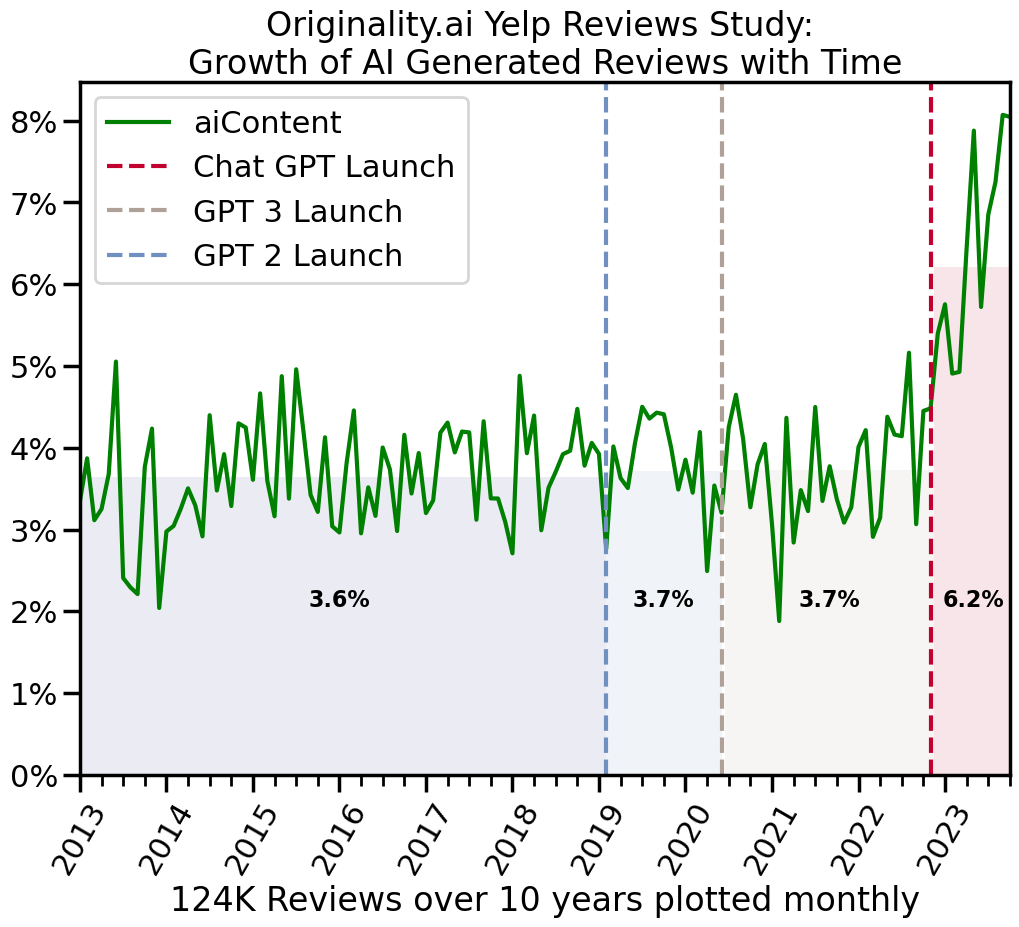

In [2]:
sns.set_context('poster')
data = plot_timeline(df, spanned=10)

# Feature Analysis: Stars (Yelp Ratings)

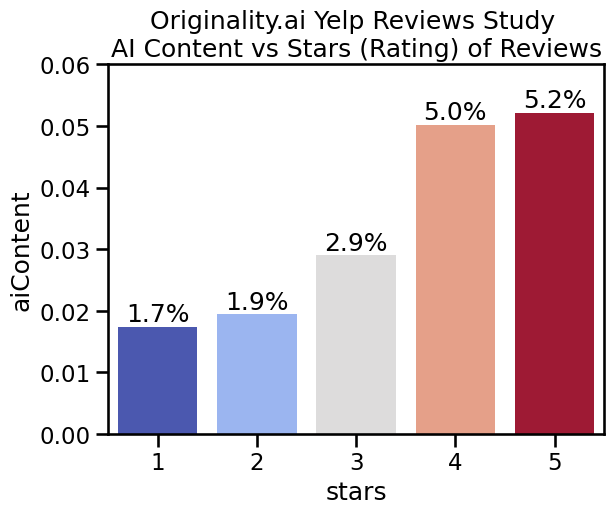

Statistical testing indicate that stars and aiContent are dependent features.





In [3]:
sns.set_context('talk')
stars_experiment(['stars'], data=data)

# Additional Experiments

## Categorical Features Analysis:
* `businessOwnerReplies`
* `elite`


businessOwnerReplies - p-value is 1.00
aiContent and businessOwnerReplies are probably independent.

elite - p-value is 1.00
aiContent and elite are probably independent.


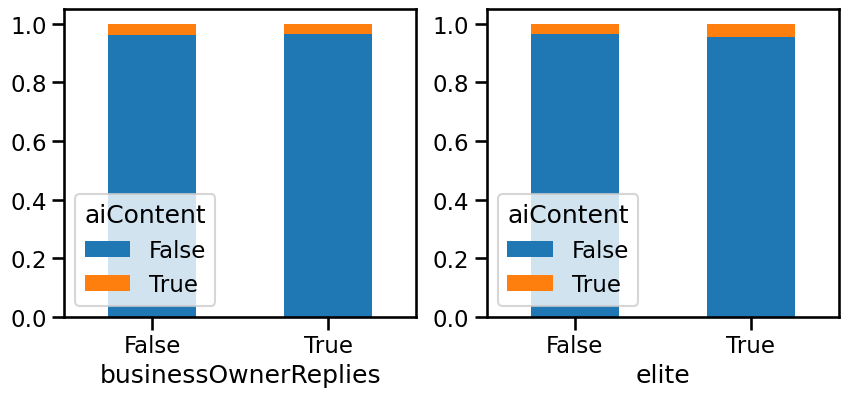

In [4]:
stats_test_categorical(df, ['businessOwnerReplies', 'elite'])

## Findings:
There is no significant relationship between the AI Content of a review and:

- if the user has elite status
- if the the Business Owner responds to the review

## Numerical Features Analysis:
* `reaction`
* `friendCount`
* `reviewCount`

In [5]:
def stats_test_numerical(num_cols, test_col='aiContent', data=df):
    data = data.copy()
    for col in num_cols:
        data[col] = np.log1p(df[col])
    num_subplots = len(num_cols)
    fig, axes = plt.subplots(1, num_subplots, figsize=(5*num_subplots, 4))
    for idx, col in enumerate(num_cols):
        tmp = data[[col, test_col]].copy()
        tmp = tmp.dropna()
        tmp[col] = tmp[col]/tmp[col].max()
        model = smf.logit(f'{col} ~ {test_col}', tmp).fit()
        

        if test_col=='aiContent':
            tmp['aiContent'].replace({True:'ai', False:'original'}, inplace=True)

        sns.barplot(data=tmp, y=col, x=test_col,
                    hue=test_col, ax=axes[idx])
        patches = []
        for patch in axes[idx].patches:
        # Get the width of each bar
            bar_height = patch.get_height()
            patches.append(bar_height)
        print("Ratio of ", patches, "is", patches[0]/patches[1], patches[1]/patches[0])
    
    
#         axes[idx].get_legend().remove()

        print(
            f"Statistical testing indicate that {col} and aiContent are", end=' ')
        print("dependent" if model.pvalues['aiContent[T.True]'] <= 0.05 else
              "independent", end=' ')
        print("features.")
    plt.suptitle("""Originality.ai Yelp Reviews Study \nReview Properties vs AI Content""")
    plt.tight_layout()
    plt.show()

Optimization terminated successfully.
         Current function value: 0.200955
         Iterations 6
Ratio of  [0.11290481487839273, 0.09610766786674872] is 1.1747742649934332 0.8512273632463253
Statistical testing indicate that reaction and aiContent are dependent features.
Optimization terminated successfully.
         Current function value: 0.620734
         Iterations 4
Ratio of  [0.35072546672335525, 0.3766642304208047] is 0.9311355801731664 1.0739574572094288
Statistical testing indicate that friendCount and aiContent are dependent features.
Optimization terminated successfully.
         Current function value: 0.633377
         Iterations 4
Ratio of  [0.371316418135192, 0.3874960946738466] is 0.9582455752172859 1.0435738247716366
Statistical testing indicate that reviewCount and aiContent are dependent features.


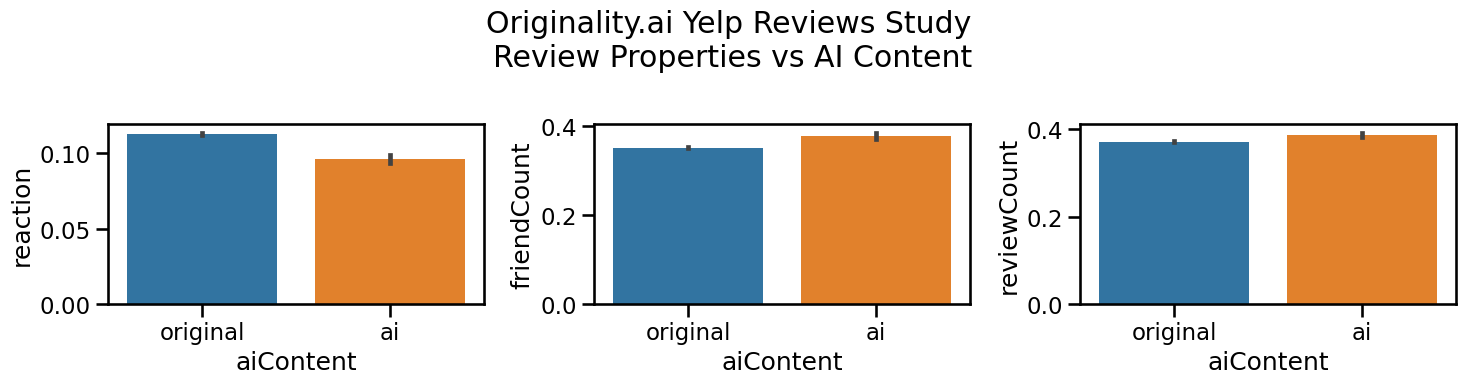

In [6]:
# Log transform of numerical data (prior to standardization for modelling)
num_cols = [
    'reaction', 
    'friendCount', 
    'reviewCount'
    ]

stats_test_numerical(num_cols, data=data)

## Findings:
There is a statististically signficant relationship between aiContent and these features:

1. `friendCount`: reviews from users with a larger friendCount are more likely to have AI Content.
2. `reviewCount`: reviews from users who have more reviews in general, are also more likely to have AI Content.
3. `reaction`: reviews that get at least one of 3 reactions (`funny`, `cool` or `useful`) from other website visitors are less likely to have AI Content. 

In [7]:
df.tail()

,stars,useful,funny,cool,date,year,businessOwnerReplies,reviewCount,friendCount,aiContent,elite,reaction
140030,4,1,0,1,2023-10-23,2023,False,471,108,False,True,1
140031,1,0,0,0,2023-10-23,2023,False,1,0,False,False,0
140032,5,0,0,0,2023-10-23,2023,False,49,135,False,False,0
140033,5,0,0,0,2023-10-23,2023,False,21,17,False,False,0
140034,1,0,0,0,2023-10-23,2023,False,3,0,False,False,0
